In [22]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [46]:
import abide_motion_wrapper as amw
reload(amw)

<module 'abide_motion_wrapper' from 'abide_motion_wrapper.pyc'>

In [43]:
behav_data_f = '../Phenotypic_V1_0b_preprocessed1.csv'

df = amw.read_in_data(behav_data_f)

motion_thresh_list=range(2,101,2)
age_l_list=range(6, 17, 1)
age_u_list=range(8, 18, 1)
n=range(10, 300, 10)

results_dict = {}

n_perms=10
for motion_thresh, age_l in range(2,101,2):
    rsq_list = amw.split_half_outcome(df, motion_thresh, age_l, age_u, n, n_perms=n_perms)

    key = (motion_thresh, age_l, age_u, n)
    results_dict[key] = [rsq_list]

In [52]:
import itertools as it

motion_thresh_list=range(2,101,2)
age_l_list=range(6, 17, 1)
age_u_list=range(8, 18, 1)
n=range(10, 300, 10)

for l, u in it.combinations(age_l_list, 2):
    print l, u

6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
9 10
9 11
9 12
9 13
9 14
9 15
9 16
10 11
10 12
10 13
10 14
10 15
10 16
11 12
11 13
11 14
11 15
11 16
12 13
12 14
12 15
12 16
13 14
13 15
13 16
14 15
14 16
15 16


In [44]:
results_dict

{(5,
  6,
  20,
  50): [array([ 0.81970394,  0.9266363 ,  0.94461842,  0.91344472,  0.92097669,
          0.93884365,  0.93346186,  0.92572693,  0.93489222,  0.94494593])],
 (10,
  6,
  20,
  50): [array([ 0.92932655,  0.93983706,  0.91930938,  0.93813949,  0.93745703,
          0.94646111,  0.94773931,  0.8922377 ,  0.8917804 ,  0.9384012 ])],
 (15,
  6,
  20,
  50): [array([ 0.92311527,  0.93310493,  0.93217975,  0.94686147,  0.9343716 ,
          0.93191725,  0.95075993,  0.91703136,  0.93519468,  0.95382757])],
 (20,
  6,
  20,
  50): [array([ 0.90008395,  0.9319726 ,  0.92850008,  0.92417009,  0.84920026,
          0.95161398,  0.93775025,  0.93814525,  0.92774173,  0.9503394 ])],
 (25,
  6,
  20,
  50): [array([ 0.94626995,  0.94954664,  0.92530945,  0.9410523 ,  0.92935038,
          0.91975506,  0.94144706,  0.92409184,  0.94609432,  0.95076392])],
 (30,
  6,
  20,
  50): [array([ 0.95702224,  0.92049723,  0.93077733,  0.94795969,  0.93001418,
          0.94721596,  0.94751897,

In [16]:
columns = [ 'motion_thresh', 'med_rsq', 'CI_95', 'n', 'age_l', 'age_u' ]
results_df = pd.DataFrame(columns = columns)

for f in glob('../RESULTS/*csv'):
    temp_df = pd.read_csv(f, index_col=0)
    results_df = results_df.append(temp_df)
    
results_df.to_csv('../RESULTS/SummaryRsqs.csv', index=None, columns=columns)

In [17]:
df = pd.read_csv('../RESULTS/SummaryRsqs.csv')
df = df.loc[df]
df.describe()

/home/ubuntu/.conda/envs/nhw16_cluster/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,motion_thresh,med_rsq,CI_95,n,age_l,age_u
count,922.000000,932.000000,932.000000,932.000000,932.000000,932.000000
mean,37.830803,0.803247,0.216525,17.339056,8.983842,14.902372
std,29.415988,0.183749,0.660336,8.486475,2.492460,2.533091
min,2.000000,0.592245,0.016569,10.000000,0.941049,0.010337
25%,NaN,0.735158,0.105995,10.000000,7.000000,13.000000
50%,NaN,0.810689,0.167836,15.000000,9.000000,15.000000
75%,NaN,0.849374,0.252406,20.000000,11.000000,17.000000
max,82.000000,6.000000,20.000000,60.000000,15.000000,20.000000


In [20]:
sns.tsplot(data=df.loc[df['n']==20, :], time='motion_thresh', value='med_rsq')

In [28]:
clean_df.loc[df['med_rsq'] > 1, :]

,motion_thresh,med_rsq,CI_95,n,age_l,age_u
784,20.0,6.0,20.0,50.0,0.941049,0.010337


In [56]:
clean_df = df.dropna(axis=0, how='any')
clean_df = clean_df.loc[df['med_rsq']<=1, :]
clean_df.describe()
clean_df.loc[df['age_u']>18]
clean_df.to_csv('../RESULTS/SummaryRsqs.csv', index=None)

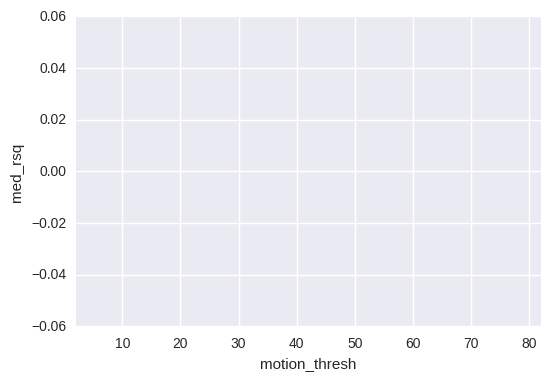

In [58]:
sns.tsplot(data=clean_df.iloc[:10, :], time="motion_thresh", value="med_rsq")

In [60]:
sns.tsplot?

In [59]:
clean_df.iloc[:10, :]

,motion_thresh,med_rsq,CI_95,n,age_l,age_u
0,42.0,0.689453,0.327587,10.0,12.0,16.0
1,2.0,0.923785,0.086767,50.0,14.0,17.0
2,82.0,0.792088,0.348287,15.0,6.0,13.0
3,62.0,0.855818,0.260060,20.0,9.0,12.0
4,42.0,0.849776,0.147301,20.0,6.0,11.0
5,82.0,0.694640,0.357196,10.0,6.0,14.0
6,2.0,0.698875,0.216103,10.0,9.0,14.0
7,62.0,0.702839,0.459061,10.0,6.0,15.0
8,62.0,0.812987,0.556746,15.0,11.0,14.0
9,62.0,0.803545,0.092543,15.0,6.0,11.0


In [38]:
mini_df = clean_df.iloc[:10, :]
mini_df

,motion_thresh,med_rsq,CI_95,n,age_l,age_u
0,42.0,0.689453,0.327587,10.0,12.0,16.0
1,2.0,0.923785,0.086767,50.0,14.0,17.0
2,82.0,0.792088,0.348287,15.0,6.0,13.0
3,62.0,0.855818,0.260060,20.0,9.0,12.0
4,42.0,0.849776,0.147301,20.0,6.0,11.0
5,82.0,0.694640,0.357196,10.0,6.0,14.0
6,2.0,0.698875,0.216103,10.0,9.0,14.0
7,62.0,0.702839,0.459061,10.0,6.0,15.0
8,62.0,0.812987,0.556746,15.0,11.0,14.0
9,62.0,0.803545,0.092543,15.0,6.0,11.0


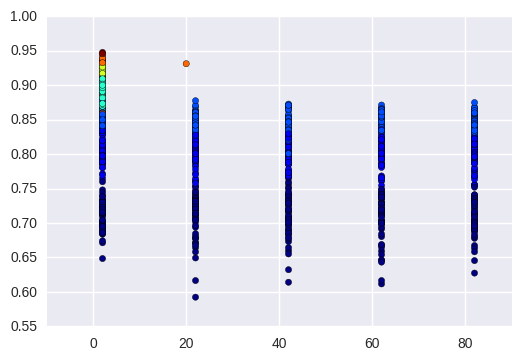

In [52]:
plt.scatter(clean_df.loc[:, "motion_thresh"], clean_df.loc[:, "med_rsq"], c=clean_df.loc[:, "n"], cmap='jet', )


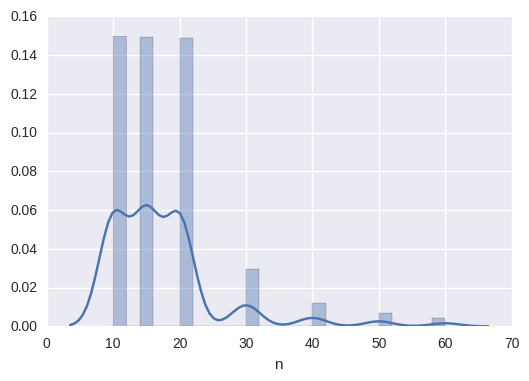

In [48]:
sns.distplot(df['n'])

In [40]:
mini_df['med_rsq']

0    0.689453
1    0.923785
2    0.792088
3    0.855818
4    0.849776
5    0.694640
6    0.698875
7    0.702839
8    0.812987
9    0.803545
Name: med_rsq, dtype: float64

In [45]:
rsq_002pct_010subs_06to09.csv


results_df = pd.DataFrame(columns = columns)

for (motion_thresh, age_l, age_u, n), rsq_list in results_dict.items():
    mean_rsq = np.mean(rsq_list)
    rsq_CI = np.percentile(rsq_list, 97.5) - np.percentile(rsq_list, 2.5)
    
    temp_df = pd.DataFrame(np.array([[motion_thresh, age_l, age_u, n, mean_rsq, rsq_CI]]), columns=columns)

    results_df = results_df.append(temp_df)
# Write into x_var y_var variance SampleSize LowerAge UpperAge

results_df

,motion_thresh,rsq,CI_95,n,age_l,age_u
0,5.0,6.0,20.0,50.0,0.920325,0.104077
0,25.0,6.0,20.0,50.0,0.937368,0.029759
0,10.0,6.0,20.0,50.0,0.928069,0.055568
0,15.0,6.0,20.0,50.0,0.935836,0.034737
0,20.0,6.0,20.0,50.0,0.923952,0.090678
0,30.0,6.0,20.0,50.0,0.929126,0.110101
